In [ ]:
import pandas as pd
import hashlib



leemos el archivo

In [ ]:
housing = pd.read_csv("housing.csv")

En este conjunto de datos, un distrito representa un grupo de bloques, que es una unidad geográfica utilizada por la Oficina del Censo de EE. UU. Un grupo de bloques es una subdivisión de un tracto censal y contiene entre 600 y 3,000 personas. Es más pequeño que una ciudad, pero más grande que una manzana individual.

Por lo tanto, en este conjunto de datos, cada fila representa un grupo de bloques (distrito).

Las características (columnas) describen diversas estadísticas de ese grupo de bloques, como el valor medio de la vivienda, el ingreso medio, la latitud, la longitud, etc.

# Análisis de variables categóricas

In [18]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Análisis de variables continuas

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


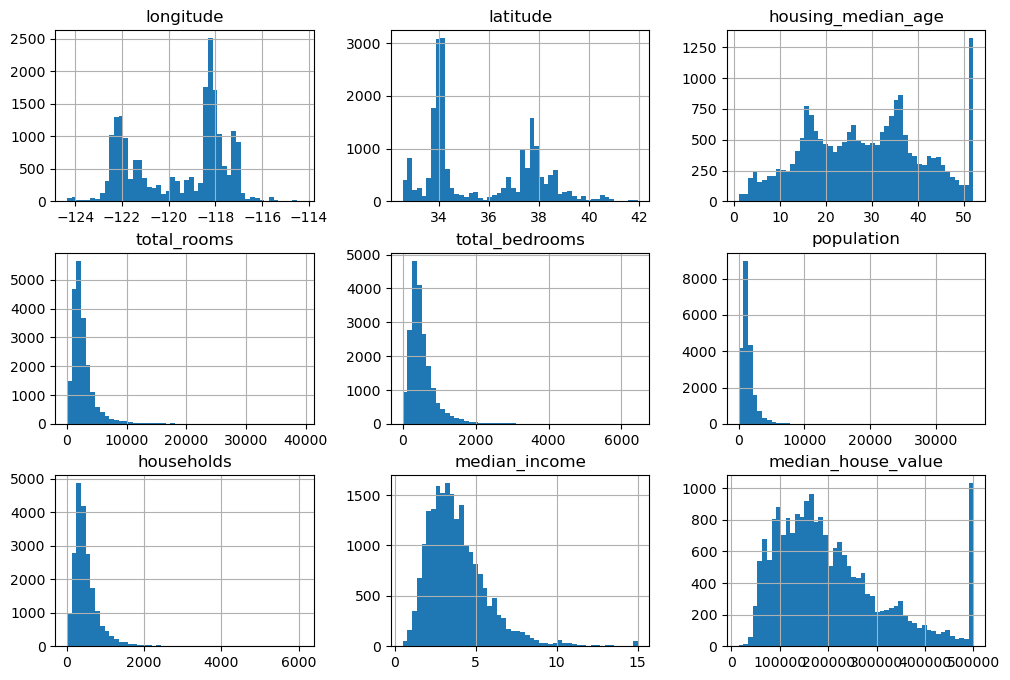

In [20]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))
plt.show()

No hay un identificador creamos uno a partir de la lontitud y latitud del distrito

In [81]:
datos = housing

In [82]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# Crear la columna de secuencia antes de aplicar la función
datos['seq'] = list(range(datos.shape[0]))

# Función corregida para crear el ID único
def create_geo_id(lat, lon, seq):
    """Genera un ID único basado en latitud, longitud y un número secuencial."""
    geo_str = f"{lat},{lon},{seq}"  # Crear string de coordenadas
    hash_obj = hashlib.sha256(geo_str.encode())  # Generar hash SHA-256
    return hash_obj.hexdigest()[:32]  # Truncar a 32 caracteres

# Aplicar la función a cada fila del DataFrame
datos['id'] = datos.apply(lambda row: create_geo_id(row['latitude'], row['longitude'], row['seq']), axis=1)
datos.drop('seq', axis=1, inplace=True)
# Mostrar algunas filas
print(datos.head())


   longitude  latitude  housing_median_age  ...  median_house_value  ocean_proximity                                id
0    -122.23     37.88                41.0  ...            452600.0         NEAR BAY  5d47f890df09e93a68476061dc5e18bf
1    -122.22     37.86                21.0  ...            358500.0         NEAR BAY  718e0f29f3ef0e5a9c388c236399c2fc
2    -122.24     37.85                52.0  ...            352100.0         NEAR BAY  a163d9a6e82eb3ee4841ca3f1c3efa79
3    -122.25     37.85                52.0  ...            341300.0         NEAR BAY  7ffc6a7ce6fc7d24d871b3a2fcfaabbc
4    -122.25     37.85                52.0  ...            342200.0         NEAR BAY  848c5a88933ae083304b07d823d59d56

[5 rows x 11 columns]


In [84]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5d47f890df09e93a68476061dc5e18bf
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,718e0f29f3ef0e5a9c388c236399c2fc
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,a163d9a6e82eb3ee4841ca3f1c3efa79
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,7ffc6a7ce6fc7d24d871b3a2fcfaabbc
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,848c5a88933ae083304b07d823d59d56
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,375309d7d71ef8a2156fd0a51600f74e
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,9237c99fc5ae78fc79942106c712911a
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,c505528c3856eab51cb058ca2e635031
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,a66d436da16b731204d8de8e8d802a96


In [72]:
datos.id.duplicated().value_counts()

id
False    20640
Name: count, dtype: int64

# Creación de variables

El número total de habitaciones en un distrito no es muy útil si no sabes cuántos hogares hay. Lo que realmente necesitas es el número de habitaciones por hogar. De manera similar, el número total de dormitorios por sí solo no es muy útil: probablemente quieras compararlo con el número de habitaciones. Además, la población por hogar también parece ser una combinación de atributos interesante para analizar.

In [85]:
datos["rooms_per_house"] = datos["total_rooms"] / datos["households"]

# Mide qué porcentaje de las habitaciones son dormitorios
datos["bedrooms_ratio"] = datos["total_bedrooms"] / datos["total_rooms"]

datos["people_per_house"] = datos["population"] / datos["households"]

In [86]:
#datos.drop(["total_bedrooms", "population"], axis=1, inplace=True)
datos = datos[["id", "longitude", "latitude", "housing_median_age", "households", "median_income", "rooms_per_house", "bedrooms_ratio", "people_per_house", "ocean_proximity",  "median_house_value"]]


In [87]:
corr_matrix = datos.drop(columns=["id", "ocean_proximity"]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
housing_median_age    0.105623
households            0.065843
people_per_house     -0.023737
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

Algunas correlaciones interesamntes aunque en realidad en los modelos de machine learning las relaciones lineales no importan tanto:

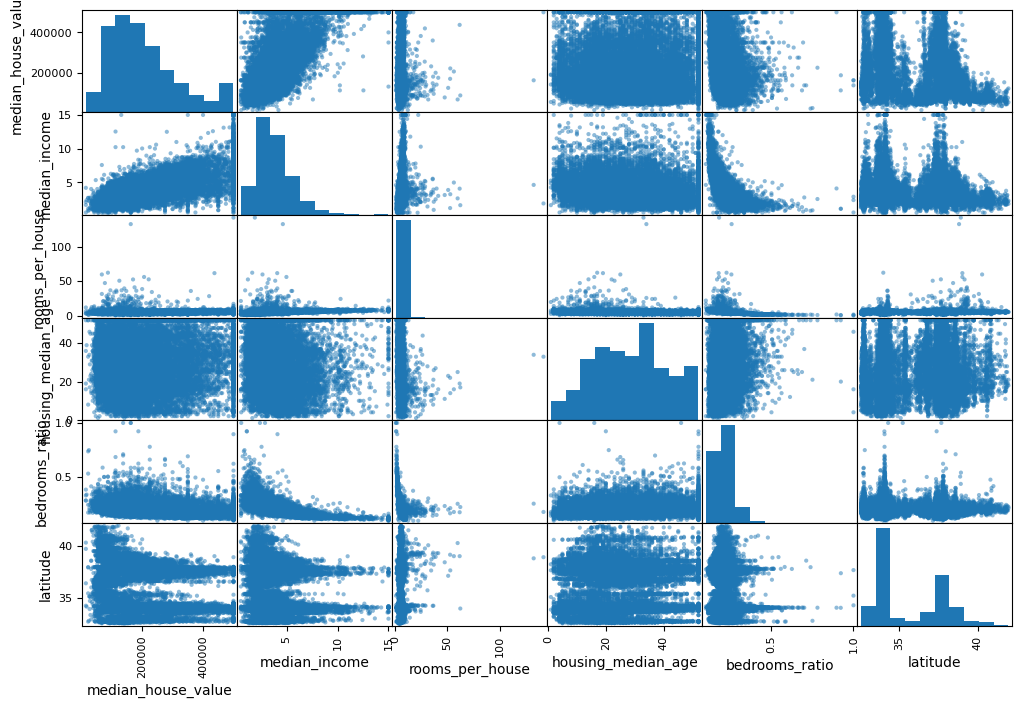

In [88]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "rooms_per_house",   
"housing_median_age", "bedrooms_ratio", "latitude"]
scatter_matrix(datos[attributes], figsize=(12, 8))
plt.show()

Ojo que las relaciones lineales no son las únicas:

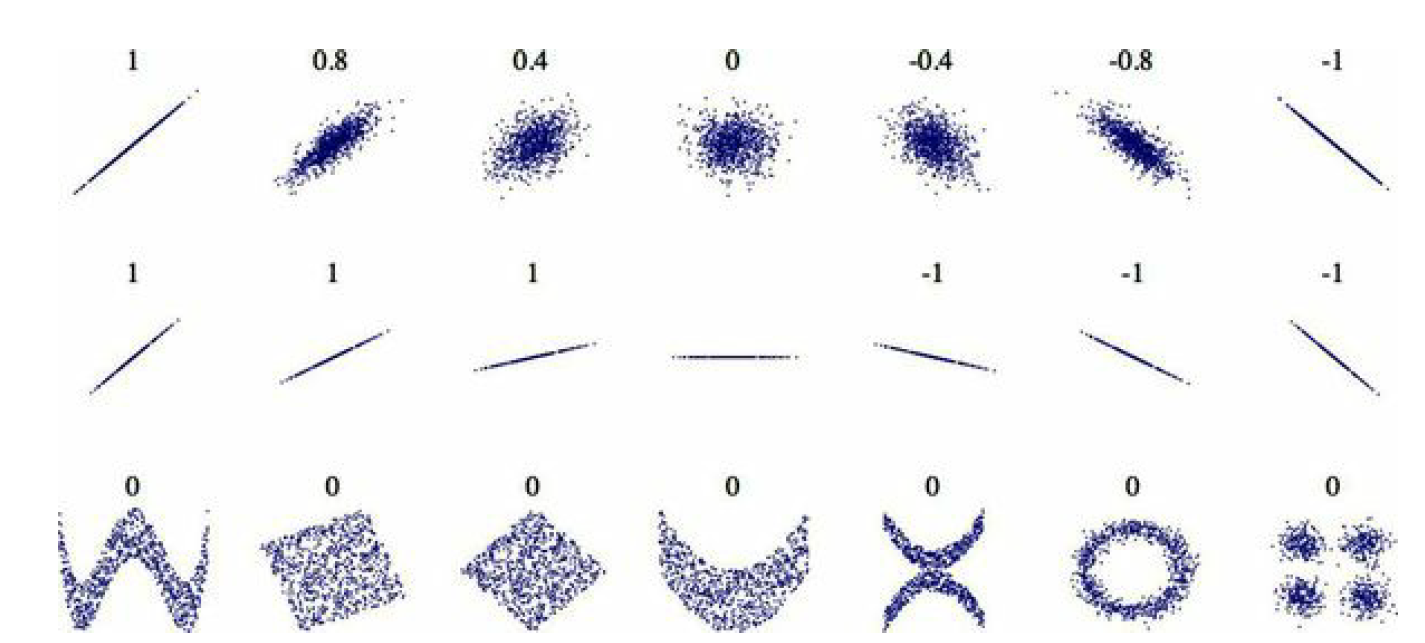

Observemos la relación espacial con el precio de la vivienda:

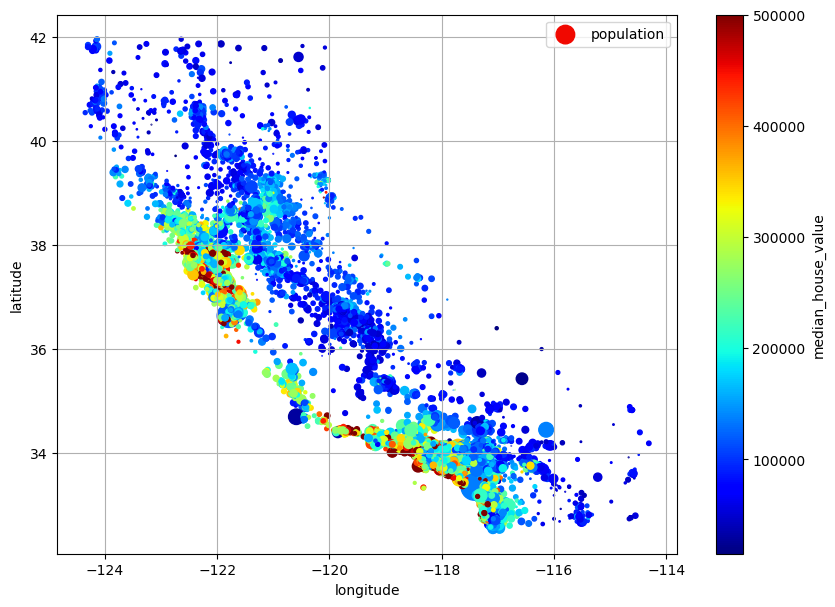

In [105]:
datos.plot(kind="scatter", x="longitude", y="latitude", grid=True,
s=housing["population"] / 100, label="population",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

# Revisión de faltantes

In [141]:
# Calcular valores faltantes
missing_summary = pd.DataFrame({
    'Missing Values': datos.isnull().sum(),
    'Percentage': datos.isnull().mean() * 100
})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Ordenar por porcentaje de valores faltantes
missing_summary = missing_summary.sort_values(by='Percentage', ascending=False)
missing_summary

,Missing Values,Percentage
bedrooms_ratio,207,1.002907


Hay faltantes en bedrooms_ratio

# Selección aleatoria

La manera más sencilla es partir en una muestra de entrenamiento de test de manera totalmente aleatoria:

In [106]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(datos, test_size=0.2, random_state=20250401)

Mejor estratificar para no dejar al azar la inclusión en grupos de altos ingresos, evaluamos los percentiles de los ingresos:

In [112]:
import numpy as np
np.quantile(datos['median_income'].dropna(), np.linspace(0, 1, 6))


array([ 0.4999 ,  2.3523 ,  3.1406 ,  3.96694,  5.10972, 15.0001 ])

In [118]:
#list(range(5))
[x +1 for x in range(5)]

[1, 2, 3, 4, 5]

In [127]:
bins_medianIncome = np.quantile(datos['median_income'].dropna(), np.linspace(0, 1, 6))
bins_medianIncome[4] = np.inf
bins_medianIncome

array([ 0.4999 ,  2.3523 ,  3.1406 ,  3.96694,      inf, 15.0001 ])

In [131]:
bins_medianIncome = np.quantile(datos['median_income'].dropna(), np.linspace(0, 1, 6))
bins_medianIncome[5] = np.inf
datos['median_incomeR'] = pd.cut(datos['median_income'] , bins=bins_medianIncome, labels=[x +1 for x in range(5)], 
include_lowest=True, right=False)
# Verificamos la cantidad:
print(datos['median_incomeR'].value_counts())


median_incomeR
3    4131
4    4128
5    4128
2    4127
1    4126
Name: count, dtype: int64


<positron-console-cell-131>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Estraticamos por las categorías de ingreso, verifiquemos que no hay valores faltantes:

In [132]:
print(datos["median_incomeR"].isna().sum())

0


In [133]:
strat_train_set, strat_test_set = train_test_split(
datos, test_size=0.2, stratify=datos["median_incomeR"], random_state=20250401)

Observemos que tenemos distribuciones parecidas en la población y en la muestra de prueba:

In [302]:
print(strat_test_set["median_incomeR"].value_counts() / len(strat_test_set))
print(datos["median_incomeR"].value_counts() / len(datos))

median_incomeR
3    0.200097
4    0.200097
5    0.200097
1    0.199855
2    0.199855
Name: count, dtype: float64
median_incomeR
3    0.200145
4    0.200000
5    0.200000
2    0.199952
1    0.199903
Name: count, dtype: float64


Podemos eliminar esta variable

In [136]:
for k in (strat_train_set, strat_test_set):
    k.drop("median_incomeR", axis=1, inplace=True)


In [303]:
print(strat_train_set)

                                     id  longitude  latitude  ...  ocean_proximity  median_house_value  median_incomeR
12157  9a6174daa6e07d5e982b906ee01d1977    -118.44     34.29  ...        <1H OCEAN            193800.0               4
6758   3a9003d16518d53532bcc20fa5cd7229    -122.31     37.93  ...         NEAR BAY            253400.0               4
2998   96c2817f3e925fa7c84bb25499e8777a    -118.17     34.04  ...        <1H OCEAN            114000.0               2
15210  0f15df7daeb517d0ff67cfbd910bae69    -117.00     32.80  ...        <1H OCEAN            144100.0               2
830    0a34ae0af99e956780268d71d880b492    -122.12     37.45  ...         NEAR BAY            155700.0               1
...                                 ...        ...       ...  ...              ...                 ...             ...
4108   b933f95b0a58219bd5ada892006c0b1d    -122.59     37.99  ...         NEAR BAY            302000.0               4
12121  8e083b669fa9c4dfd3b22f869ea1245e    -117.

# Procesos de limpieza de datos
Imputar una variable tiene varias alternativas, elimianr la variable en el análisis (gran perdida de información por que puede ser una variable que aporte mucho a la predicción), eliminar los registros que corresponden a los valores faltantes de la variable, y finalmente realizar un proceso de imputación.

## Imputación

In [248]:
strat_train_set.isna().sum()

id                      0
longitude               0
latitude                0
housing_median_age      0
households              0
median_income           0
rooms_per_house         0
bedrooms_ratio        167
people_per_house        0
ocean_proximity         0
median_house_value      0
dtype: int64

## Imputación por mediana

In [253]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# 🔹 1. Seleccionar solo las columnas numéricas
num_columns = strat_train_set.select_dtypes(include=[np.number]).columns

# 🔹 2. Inicializar el imputador con la estrategia de la mediana
imputer = SimpleImputer(strategy="median")

# 🔹 3. Ajustar el imputador con los datos numéricos de entrenamiento
imputer.fit(strat_train_set[num_columns])

# 🔹 4. Transformar los conjuntos de entrenamiento y prueba
train_imputed = imputer.transform(strat_train_set[num_columns])
test_imputed = imputer.transform(strat_test_set[num_columns])

# 🔹 5. Convertirlos nuevamente en DataFrames conservando columnas e índices
housing_train = pd.DataFrame(train_imputed, columns=num_columns, index=strat_train_set.index)
housing_test = pd.DataFrame(test_imputed, columns=num_columns, index=strat_test_set.index)

# ✅ Verificar el resultado
print(housing_train.head())
print(housing_test.head())


       longitude  latitude  housing_median_age  ...  bedrooms_ratio  people_per_house  median_house_value
12157    -118.44     34.29                35.0  ...        0.171527          3.849010            193800.0
6758     -122.31     37.93                36.0  ...        0.169788          2.269802            253400.0
2998     -118.17     34.04                45.0  ...        0.261251          4.388646            114000.0
15210    -117.00     32.80                29.0  ...        0.194621          2.478261            144100.0
830      -122.12     37.45                38.0  ...        0.246082          3.327526            155700.0

[5 rows x 9 columns]
       longitude  latitude  housing_median_age  ...  bedrooms_ratio  people_per_house  median_house_value
19969    -117.24     33.85                 8.0  ...        0.194956          3.385475            136300.0
18490    -117.01     32.81                21.0  ...        0.147038          2.700000            193500.0
2029     -117.74     34.

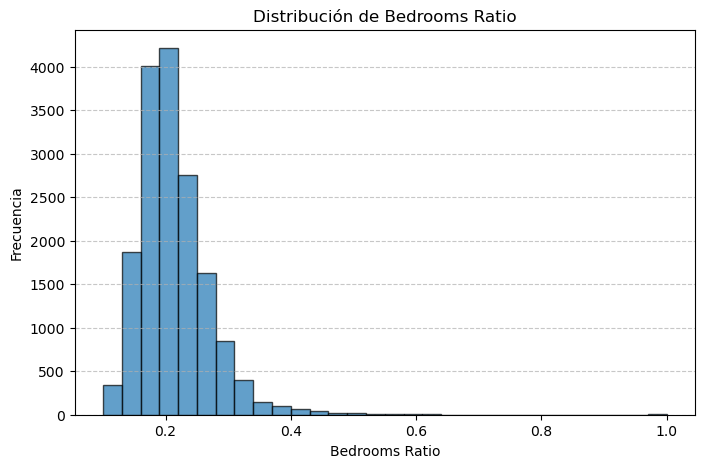

In [254]:
import matplotlib.pyplot as plt

# 🔹 Crear el histograma
plt.figure(figsize=(8, 5))
plt.hist(housing_train["bedrooms_ratio"], bins=30, edgecolor="black", alpha=0.7)

# 🔹 Etiquetas y título
plt.xlabel("Bedrooms Ratio")
plt.ylabel("Frecuencia")
plt.title("Distribución de Bedrooms Ratio")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 🔹 Mostrar el gráfico
plt.show()


## Imputación por vecino más cercano

In [255]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# 🔹 1. Seleccionar solo las columnas numéricas
num_columns = strat_train_set.select_dtypes(include=[np.number]).columns

# 🔹 2. Inicializar el imputador KNN (puedes ajustar `n_neighbors`)
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# 🔹 3. Ajustar el imputador con los datos numéricos de entrenamiento y transformar
train_imputed = imputer.fit_transform(strat_train_set[num_columns])
test_imputed = imputer.transform(strat_test_set[num_columns])

# 🔹 4. Convertir los resultados en DataFrames conservando nombres de columnas e índices
housing_train = pd.DataFrame(train_imputed, columns=num_columns, index=strat_train_set.index)
housing_test = pd.DataFrame(test_imputed, columns=num_columns, index=strat_test_set.index)

# ✅ Verificar el resultado
print(housing_train.head())
print(housing_test.head())


       longitude  latitude  housing_median_age  ...  bedrooms_ratio  people_per_house  median_house_value
12157    -118.44     34.29                35.0  ...        0.171527          3.849010            193800.0
6758     -122.31     37.93                36.0  ...        0.169788          2.269802            253400.0
2998     -118.17     34.04                45.0  ...        0.261251          4.388646            114000.0
15210    -117.00     32.80                29.0  ...        0.194621          2.478261            144100.0
830      -122.12     37.45                38.0  ...        0.246082          3.327526            155700.0

[5 rows x 9 columns]
       longitude  latitude  housing_median_age  ...  bedrooms_ratio  people_per_house  median_house_value
19969    -117.24     33.85                 8.0  ...        0.194956          3.385475            136300.0
18490    -117.01     32.81                21.0  ...        0.147038          2.700000            193500.0
2029     -117.74     34.

In [256]:
housing_train.isna().sum()

longitude             0
latitude              0
housing_median_age    0
households            0
median_income         0
rooms_per_house       0
bedrooms_ratio        0
people_per_house      0
median_house_value    0
dtype: int64

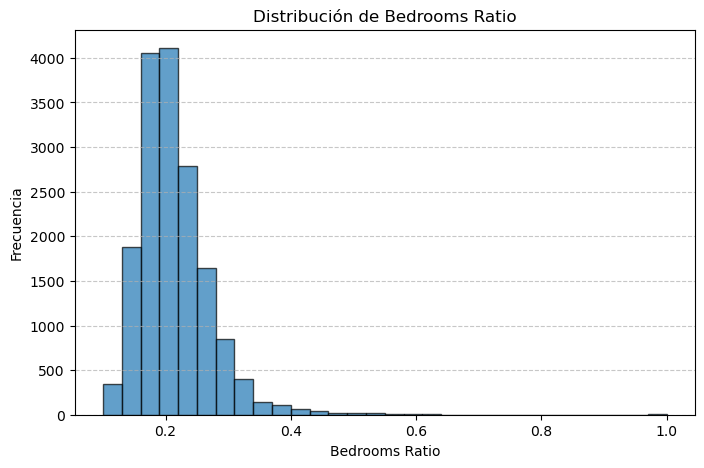

In [257]:
import matplotlib.pyplot as plt

# 🔹 Crear el histograma
plt.figure(figsize=(8, 5))
plt.hist(housing_train["bedrooms_ratio"], bins=30, edgecolor="black", alpha=0.7)

# 🔹 Etiquetas y título
plt.xlabel("Bedrooms Ratio")
plt.ylabel("Frecuencia")
plt.title("Distribución de Bedrooms Ratio")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 🔹 Mostrar el gráfico
plt.show()


In [ ]:
# prueba.dropna(subset=["total_bedrooms"], inplace=True) # option 1
# prueba.drop("total_bedrooms", axis=1) # option 2

# Categorización de variables categóricas

# Ordinal Encoding

Se puede usar cuando se tiene una variable de tipo categórica y hay una lógica de orden en los niveles de la variable categórica. Por ejemplo en la variable nivel educativa:

| Educación   | Codificado |
|------------|------------|
| Primaria   | 0          |
| Secundaria | 1          |
| Universidad| 2          |
| Doctorado  | 3          |

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# 🔹 1. Seleccionar solo la columna categórica 'ocean_proximity'
housing_cat_train = strat_train_set[['ocean_proximity']]
housing_cat_test = strat_test_set[['ocean_proximity']]

# 🔹 2. Inicializar y aplicar OrdinalEncoder
cat_encoder = OrdinalEncoder()
housing_cat_train_encoded = cat_encoder.fit_transform(housing_cat_train)
housing_cat_test_encoded = cat_encoder.transform(housing_cat_test)

# 🔹 3. Convertir a DataFrame con nombres de columnas correctos
df_train_ordcat = pd.DataFrame(housing_cat_train_encoded, 
                        columns=['ocean_proximity_encoded'], 
                        index=strat_train_set.index)

df_test_ordcat = pd.DataFrame(housing_cat_test_encoded, 
                       columns=['ocean_proximity_encoded'], 
                       index=strat_test_set.index)

# ✅ Verificar el resultado
print(df_train_ordcat.head())


       ocean_proximity_encoded
12157                      0.0
6758                       3.0
2998                       0.0
15210                      0.0
830                        3.0


# One hot Encoding

In [259]:
strat_train_set['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7341
INLAND        5185
NEAR OCEAN    2140
NEAR BAY      1843
ISLAND           3
Name: count, dtype: int64

In [229]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 🔹 1. Seleccionar solo la columna categórica 'ocean_proximity'
housing_cat_train = strat_train_set[['ocean_proximity']]
housing_cat_test = strat_test_set[['ocean_proximity']]

# 🔹 2. Inicializar y aplicar OneHotEncoder
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
housing_cat_train_1hot = cat_encoder.fit_transform(housing_cat_train)
housing_cat_test_1hot = cat_encoder.transform(housing_cat_test)

# 🔹 3. Convertir a DataFrame con nombres de columnas correctos
df_train = pd.DataFrame(housing_cat_train_1hot, 
                        columns=cat_encoder.get_feature_names_out(), 
                        index=strat_train_set.index)

df_test = pd.DataFrame(housing_cat_test_1hot, 
                       columns=cat_encoder.get_feature_names_out(), 
                       index=strat_test_set.index)

# ✅ Verificar el resultado
print(df_train.head())


       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ...  ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN
12157                        1.0                     0.0  ...                       0.0                         0.0
6758                         0.0                     0.0  ...                       1.0                         0.0
2998                         1.0                     0.0  ...                       0.0                         0.0
15210                        1.0                     0.0  ...                       0.0                         0.0
830                          0.0                     0.0  ...                       1.0                         0.0

[5 rows x 5 columns]


In [230]:
df_train.shape

(16512, 5)

# Escalamiento de variables continuas

In [238]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 🔹 1. Seleccionar solo columnas numéricas
num_columns = strat_train_set.select_dtypes(include=[np.number]).columns
housing_train_num = strat_train_set[num_columns]
housing_test_num = strat_test_set[num_columns]

# 🔹 2. Inicializar y aplicar StandardScaler
std_scaler = StandardScaler()
housing_train_scaled = std_scaler.fit_transform(housing_train_num)
housing_test_scaled = std_scaler.transform(housing_test_num)

# 🔹 3. Convertir los resultados en DataFrames manteniendo columnas e índices
housing_train_scaled = pd.DataFrame(housing_train_scaled, 
                                    columns=num_columns, 
                                    index=strat_train_set.index)

housing_test_scaled = pd.DataFrame(housing_test_scaled, 
                                   columns=num_columns, 
                                   index=strat_test_set.index)

# ✅ Verificar el resultado
print(housing_train_scaled.head())
print(housing_test_scaled.head())


       longitude  latitude  housing_median_age  ...  bedrooms_ratio  people_per_house  median_house_value
12157   0.566467 -0.627699            0.505147  ...       -0.713336          0.066448           -0.112698
6758   -1.367746  1.078852            0.584649  ...       -0.743148         -0.071299            0.406772
2998    0.701412 -0.744907            1.300163  ...        0.824390          0.113518           -0.808231
15210   1.286175 -1.326260            0.028138  ...       -0.317546         -0.053117           -0.545881
830    -1.272785  0.853813            0.743652  ...        0.564403          0.020961           -0.444776

[5 rows x 9 columns]
       longitude  latitude  housing_median_age  ...  bedrooms_ratio  people_per_house  median_house_value
19969   1.166223 -0.833986           -1.641395  ...       -0.311799          0.026016           -0.613865
18490   1.281177 -1.321572           -0.607875  ...       -1.133045         -0.033775           -0.115313
2029    0.916325 -0.7167

In [243]:
print(housing_train_scaled.mean(axis = 0))
print(housing_train_scaled.std(axis = 0))

longitude             6.482218e-15
latitude              2.689494e-17
housing_median_age    9.909440e-17
households           -2.506608e-17
median_income         1.635750e-16
rooms_per_house      -1.411446e-16
bedrooms_ratio        2.393110e-16
people_per_house      4.679719e-18
median_house_value    8.401979e-17
dtype: float64
longitude             1.000030
latitude              1.000030
housing_median_age    1.000030
households            1.000030
median_income         1.000030
rooms_per_house       1.000030
bedrooms_ratio        1.000031
people_per_house      1.000030
median_house_value    1.000030
dtype: float64


# Cómo crear Pipelines personalizados (Tópico avanzadao)

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CustomStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self, centra=True, escala=True):
        """
        Parámetros:
        - centra: Si True, centra los datos restando la media.
        - escala: Si True, escala los datos dividiendo por la desviación estándar.
        """
        self.centra = centra
        self.escala = escala
        self.mean_ = None  # Media calculada en fit()
        self.sd_ = None  # Desviación estándar calculada en fit()

    def fit(self, X, y=None):
        """Calcula la media y desviación estándar para estandarizar después."""
        if self.centra:
            self.mean_ = np.mean(X, axis=0)
        if self.escala:
            self.scale_ = np.std(X, axis=0)
        return self

    def transform(self, X):
        """Aplica la estandarización usando la media y desviación estándar calculadas."""
        if self.centra:
            X = X - self.mean_
        if self.escala:
            X = X / self.scale_
        return X

    #def fit_transform(self, X, y=None):
    #    """Ajusta y transforma en un solo paso."""
    #    return self.fit(X).transform(X)

In [ ]:
# Datos de ejemplo
data = {'feature1': [10, 20, 30, 40, 50], 'feature2': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Inicializar el scaler personalizado
custom_scaler = CustomStandardScaler(centra=True, escala=True)

# Aplicar transformación
X_scaled = custom_scaler.fit_transform(df.values)
print("Datos estandarizados:\n", X_scaled)
print("Promedio y Desviaciones estándares: \n\n")
print(X_scaled.std(axis = 0))
print(X_scaled.mean(axis = 0))

Datos estandarizados:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
Desviación estándar: 


[1. 1.]
[0. 0.]


# Usos de Pipelines para el preprocesamiento completo

In [263]:
datos = housing


import pandas as pd
import hashlib

# Crear la columna de secuencia antes de aplicar la función
datos['seq'] = list(range(datos.shape[0]))

# Función corregida para crear el ID único
def create_geo_id(lat, lon, seq):
    """Genera un ID único basado en latitud, longitud y un número secuencial."""
    geo_str = f"{lat},{lon},{seq}"  # Crear string de coordenadas
    hash_obj = hashlib.sha256(geo_str.encode())  # Generar hash SHA-256
    return hash_obj.hexdigest()[:32]  # Truncar a 32 caracteres

# Aplicar la función a cada fila del DataFrame
datos['id'] = datos.apply(lambda row: create_geo_id(row['latitude'], row['longitude'], row['seq']), axis=1)
datos.drop('seq', axis=1, inplace=True)
# Mostrar algunas filas
print(datos.head())

datos["rooms_per_house"] = datos["total_rooms"] / datos["households"]

# Mide qué porcentaje de las habitaciones son dormitorios
datos["bedrooms_ratio"] = datos["total_bedrooms"] / datos["total_rooms"]

datos["people_per_house"] = datos["population"] / datos["households"]

datos = datos[["id", "longitude", "latitude", "housing_median_age", "households", "median_income", "rooms_per_house", "bedrooms_ratio", "people_per_house", "ocean_proximity",  "median_house_value"]]

bins_medianIncome = np.quantile(datos['median_income'].dropna(), np.linspace(0, 1, 6))
bins_medianIncome[5] = np.inf
datos['median_incomeR'] = pd.cut(datos['median_income'] , bins=bins_medianIncome, labels=[x +1 for x in range(5)], 
include_lowest=True, right=False)


strat_train_set, strat_test_set = train_test_split(
datos, test_size=0.2, stratify=datos["median_incomeR"], random_state=20250401)

   longitude  latitude  housing_median_age  ...  rooms_per_house  bedrooms_ratio  people_per_house
0    -122.23     37.88                41.0  ...         6.984127        0.146591          2.555556
1    -122.22     37.86                21.0  ...         6.238137        0.155797          2.109842
2    -122.24     37.85                52.0  ...         8.288136        0.129516          2.802260
3    -122.25     37.85                52.0  ...         5.817352        0.184458          2.547945
4    -122.25     37.85                52.0  ...         6.281853        0.172096          2.181467

[5 rows x 14 columns]


<positron-console-cell-263>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [264]:
datos.columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'households', 'median_income', 'rooms_per_house',
       'bedrooms_ratio', 'people_per_house', 'ocean_proximity', 'median_house_value', 'median_incomeR'],
      dtype='object')

In [ ]:
# Identify numeric columns
numeric_features = datos.select_dtypes(include=["number"]).columns.tolist()

# Define the pipeline for numeric features
numeric_transformer = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),  # Impute missing values in total_bedrooms
    ("scaler", CustomStandardScaler())             # Standardize numeric columns
])

# Apply transformations
preprocessor = ColumnTransformer([
    ("imputaEstand", numeric_transformer, numeric_features)
])


# Fit and transform
train_transformed = preprocessor.fit_transform(strat_train_set)
test_transformed = preprocessor.transform(strat_test_set)

# Convert back to DataFrame
train_transformed_df = pd.DataFrame(train_transformed, columns=numeric_features)
test_transformed_df = pd.DataFrame(test_transformed, columns=numeric_features)

# Show results
print(train_transformed_df.head())


In [269]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# 🔹 Identificar columnas numéricas y categóricas
numeric_features = datos.select_dtypes(include=["number"]).columns.tolist()
categorical_features = ["ocean_proximity"]  # Solo tenemos una categórica

# 🔹 Pipeline para características numéricas
numeric_transformer = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),  # Imputación KNN
    ("scaler", StandardScaler())             # Estandarización
])

# 🔹 Pipeline para características categóricas
categorical_transformer = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# 🔹 Aplicar transformaciones con ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# 🔹 Ajustar y transformar los datos
train_transformed = preprocessor.fit_transform(strat_train_set)
test_transformed = preprocessor.transform(strat_test_set)

# 🔹 Obtener nombres de las columnas después de transformación
cat_columns = preprocessor.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(categorical_features)
all_columns = numeric_features + cat_columns.tolist()


In [267]:
print(cat_columns)

['ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND' 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']


In [270]:

# 🔹 Convertir a DataFrame
train_transformed_df = pd.DataFrame(train_transformed, columns=all_columns, index=strat_train_set.index)
test_transformed_df = pd.DataFrame(test_transformed, columns=all_columns, index=strat_test_set.index)

# ✅ Verificar resultado
print(train_transformed_df.head())


       longitude  latitude  ...  ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN
12157   0.566467 -0.627699  ...                       0.0                         0.0
6758   -1.367746  1.078852  ...                       1.0                         0.0
2998    0.701412 -0.744907  ...                       0.0                         0.0
15210   1.286175 -1.326260  ...                       0.0                         0.0
830    -1.272785  0.853813  ...                       1.0                         0.0

[5 rows x 14 columns]


# Modelo de regresión

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 🔹 1. Separar características y la variable objetivo
target = "median_house_value"  # Variable a predecir
X_train = train_transformed_df.drop(columns=[target], errors='ignore')
y_train = strat_train_set[target]

X_test = test_transformed_df.drop(columns=[target], errors='ignore')
y_test = strat_test_set[target]

# 🔹 2. Entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 🔹 3. Hacer predicciones
y_pred = model.predict(X_test)

# 🔹 4. Evaluar el modelo con métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# ✅ 5. Mostrar métricas
print(f"📌 MAE (Error absoluto medio): {mae:.2f}")
print(f"📌 RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f"📌 R² (Coeficiente de determinación): {r2:.4f}")


📌 MAE (Error absoluto medio): 51115.04
📌 RMSE (Raíz del error cuadrático medio): 71090.79
📌 R² (Coeficiente de determinación): 0.6370


# Random forest

In [272]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 🔹 1. Definir y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 2. Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# 🔹 3. Evaluar el modelo con métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# ✅ 4. Mostrar métricas
print(f"🌲 Random Forest Metrics:")
print(f"📌 MAE (Error absoluto medio): {mae_rf:.2f}")
print(f"📌 RMSE (Raíz del error cuadrático medio): {rmse_rf:.2f}")
print(f"📌 R² (Coeficiente de determinación): {r2_rf:.4f}")


🌲 Random Forest Metrics:
📌 MAE (Error absoluto medio): 32451.46
📌 RMSE (Raíz del error cuadrático medio): 50174.21
📌 R² (Coeficiente de determinación): 0.8192


In [297]:
datos.median_house_value.mean()



206855.81690891474

# Xgboost

In [274]:
""" from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 🔹 1. Definir y entrenar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# 🔹 2. Hacer predicciones
y_pred_xgb = xgb_model.predict(X_test)

# 🔹 3. Evaluar el modelo con métricas
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# ✅ 4. Mostrar métricas
print(f"🚀 XGBoost Metrics:")
print(f"📌 MAE (Error absoluto medio): {mae_xgb:.2f}")
print(f"📌 RMSE (Raíz del error cuadrático medio): {rmse_xgb:.2f}")
print(f"📌 R² (Coeficiente de determinación): {r2_xgb:.4f}")
 """

' from xgboost import XGBRegressor\nfrom sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score\nimport numpy as np\n\n# 🔹 1. Definir y entrenar el modelo XGBoost\nxgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)\nxgb_model.fit(X_train, y_train)\n\n# 🔹 2. Hacer predicciones\ny_pred_xgb = xgb_model.predict(X_test)\n\n# 🔹 3. Evaluar el modelo con métricas\nmae_xgb = mean_absolute_error(y_test, y_pred_xgb)\nrmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))\nr2_xgb = r2_score(y_test, y_pred_xgb)\n\n# ✅ 4. Mostrar métricas\nprint(f"🚀 XGBoost Metrics:")\nprint(f"📌 MAE (Error absoluto medio): {mae_xgb:.2f}")\nprint(f"📌 RMSE (Raíz del error cuadrático medio): {rmse_xgb:.2f}")\nprint(f"📌 R² (Coeficiente de determinación): {r2_xgb:.4f}")\n '